## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  54.958708   919.843168  0.768070  5.730435   708.647681
1  71.197820   540.400671  0.383755  3.718067   219.195714
2  48.225984  1345.009401  0.907499  7.022168  1221.556435
3   1.151731   417.609145  0.651750  6.126353   272.299348
4  72.564846   758.411155  0.800351  8.771818   610.981855


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9766707	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9666540	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9563886	total: 58.8ms	remaining: 19.6s
3:	learn: 0.9454060	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9338294	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9230262	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9113141	total: 60.7ms	remaining: 8.62s
7:	learn: 0.8997600	total: 61.2ms	remaining: 7.58s
8:	learn: 0.8889604	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8769453	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8679617	total: 62.8ms	remaining: 5.64s
11:	learn: 0.8547462	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8443247	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8324071	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8231648	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8142382	total: 65ms	remaining: 4s
16:	learn: 0.8037732	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7938010	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7861533	total: 66.1ms	remaining: 3.4

75:	learn: 0.4070437	total: 92.5ms	remaining: 1.12s
76:	learn: 0.4024234	total: 93ms	remaining: 1.11s
77:	learn: 0.3982896	total: 93.5ms	remaining: 1.1s
78:	learn: 0.3932521	total: 94ms	remaining: 1.1s
79:	learn: 0.3887206	total: 94.4ms	remaining: 1.09s
80:	learn: 0.3840653	total: 94.9ms	remaining: 1.08s
81:	learn: 0.3811704	total: 95.5ms	remaining: 1.07s
82:	learn: 0.3769384	total: 96ms	remaining: 1.06s
83:	learn: 0.3734885	total: 96.6ms	remaining: 1.05s
84:	learn: 0.3696744	total: 97.1ms	remaining: 1.04s
85:	learn: 0.3660071	total: 97.6ms	remaining: 1.04s
86:	learn: 0.3622685	total: 98.1ms	remaining: 1.03s
87:	learn: 0.3585246	total: 98.6ms	remaining: 1.02s
88:	learn: 0.3550030	total: 99.1ms	remaining: 1.01s
89:	learn: 0.3512425	total: 99.6ms	remaining: 1.01s
90:	learn: 0.3481939	total: 100ms	remaining: 1s
91:	learn: 0.3452447	total: 101ms	remaining: 994ms
92:	learn: 0.3418591	total: 101ms	remaining: 987ms
93:	learn: 0.3382717	total: 102ms	remaining: 981ms
94:	learn: 0.3345978	total:

285:	learn: 0.0786964	total: 185ms	remaining: 461ms
286:	learn: 0.0784935	total: 185ms	remaining: 461ms
287:	learn: 0.0782924	total: 186ms	remaining: 460ms
288:	learn: 0.0780950	total: 186ms	remaining: 458ms
289:	learn: 0.0778871	total: 187ms	remaining: 458ms
290:	learn: 0.0776914	total: 187ms	remaining: 456ms
291:	learn: 0.0774738	total: 188ms	remaining: 455ms
292:	learn: 0.0769186	total: 188ms	remaining: 454ms
293:	learn: 0.0763730	total: 189ms	remaining: 453ms
294:	learn: 0.0761864	total: 189ms	remaining: 452ms
295:	learn: 0.0757250	total: 189ms	remaining: 450ms
296:	learn: 0.0755421	total: 190ms	remaining: 449ms
297:	learn: 0.0750832	total: 190ms	remaining: 448ms
298:	learn: 0.0749018	total: 191ms	remaining: 447ms
299:	learn: 0.0747239	total: 191ms	remaining: 446ms
300:	learn: 0.0745023	total: 191ms	remaining: 445ms
301:	learn: 0.0743193	total: 192ms	remaining: 443ms
302:	learn: 0.0741466	total: 192ms	remaining: 442ms
303:	learn: 0.0739739	total: 193ms	remaining: 441ms
304:	learn: 

451:	learn: 0.0409204	total: 257ms	remaining: 312ms
452:	learn: 0.0406902	total: 258ms	remaining: 311ms
453:	learn: 0.0404557	total: 258ms	remaining: 311ms
454:	learn: 0.0402020	total: 259ms	remaining: 310ms
455:	learn: 0.0399743	total: 259ms	remaining: 309ms
456:	learn: 0.0397514	total: 260ms	remaining: 308ms
457:	learn: 0.0395059	total: 260ms	remaining: 308ms
458:	learn: 0.0394623	total: 260ms	remaining: 307ms
459:	learn: 0.0392402	total: 261ms	remaining: 306ms
460:	learn: 0.0391974	total: 262ms	remaining: 306ms
461:	learn: 0.0389463	total: 262ms	remaining: 305ms
462:	learn: 0.0387097	total: 263ms	remaining: 305ms
463:	learn: 0.0384949	total: 263ms	remaining: 304ms
464:	learn: 0.0384532	total: 264ms	remaining: 303ms
465:	learn: 0.0382247	total: 264ms	remaining: 303ms
466:	learn: 0.0381837	total: 264ms	remaining: 302ms
467:	learn: 0.0379446	total: 265ms	remaining: 301ms
468:	learn: 0.0377316	total: 265ms	remaining: 300ms
469:	learn: 0.0375112	total: 266ms	remaining: 300ms
470:	learn: 

646:	learn: 0.0170305	total: 349ms	remaining: 190ms
647:	learn: 0.0169986	total: 349ms	remaining: 190ms
648:	learn: 0.0168957	total: 350ms	remaining: 189ms
649:	learn: 0.0168257	total: 350ms	remaining: 189ms
650:	learn: 0.0167536	total: 351ms	remaining: 188ms
651:	learn: 0.0167242	total: 351ms	remaining: 187ms
652:	learn: 0.0167076	total: 352ms	remaining: 187ms
653:	learn: 0.0166079	total: 352ms	remaining: 186ms
654:	learn: 0.0165695	total: 353ms	remaining: 186ms
655:	learn: 0.0164722	total: 353ms	remaining: 185ms
656:	learn: 0.0163769	total: 354ms	remaining: 185ms
657:	learn: 0.0163526	total: 354ms	remaining: 184ms
658:	learn: 0.0162595	total: 355ms	remaining: 183ms
659:	learn: 0.0162302	total: 355ms	remaining: 183ms
660:	learn: 0.0161391	total: 355ms	remaining: 182ms
661:	learn: 0.0161106	total: 356ms	remaining: 182ms
662:	learn: 0.0160215	total: 356ms	remaining: 181ms
663:	learn: 0.0159954	total: 357ms	remaining: 181ms
664:	learn: 0.0159083	total: 357ms	remaining: 180ms
665:	learn: 

817:	learn: 0.0092860	total: 436ms	remaining: 97ms
818:	learn: 0.0092464	total: 437ms	remaining: 96.6ms
819:	learn: 0.0092333	total: 437ms	remaining: 96ms
820:	learn: 0.0092176	total: 438ms	remaining: 95.5ms
821:	learn: 0.0092047	total: 438ms	remaining: 94.9ms
822:	learn: 0.0091643	total: 439ms	remaining: 94.4ms
823:	learn: 0.0091490	total: 439ms	remaining: 93.9ms
824:	learn: 0.0091313	total: 440ms	remaining: 93.3ms
825:	learn: 0.0091043	total: 441ms	remaining: 92.8ms
826:	learn: 0.0090579	total: 441ms	remaining: 92.3ms
827:	learn: 0.0090139	total: 442ms	remaining: 91.7ms
828:	learn: 0.0089792	total: 442ms	remaining: 91.2ms
829:	learn: 0.0089416	total: 443ms	remaining: 90.6ms
830:	learn: 0.0089292	total: 443ms	remaining: 90.1ms
831:	learn: 0.0088918	total: 444ms	remaining: 89.6ms
832:	learn: 0.0088658	total: 444ms	remaining: 89.1ms
833:	learn: 0.0088217	total: 445ms	remaining: 88.6ms
834:	learn: 0.0087792	total: 446ms	remaining: 88.1ms
835:	learn: 0.0087362	total: 446ms	remaining: 87.6

991:	learn: 0.0052605	total: 526ms	remaining: 4.24ms
992:	learn: 0.0052458	total: 527ms	remaining: 3.71ms
993:	learn: 0.0052372	total: 527ms	remaining: 3.18ms
994:	learn: 0.0052189	total: 528ms	remaining: 2.65ms
995:	learn: 0.0052104	total: 529ms	remaining: 2.12ms
996:	learn: 0.0052007	total: 529ms	remaining: 1.59ms
997:	learn: 0.0051829	total: 530ms	remaining: 1.06ms
998:	learn: 0.0051745	total: 530ms	remaining: 530us
999:	learn: 0.0051554	total: 531ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

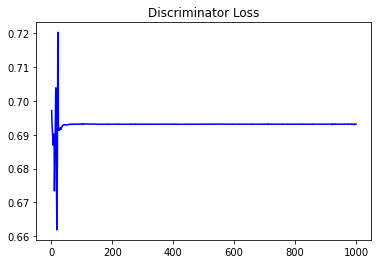

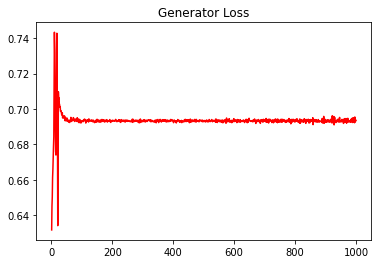

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.024745009371781392


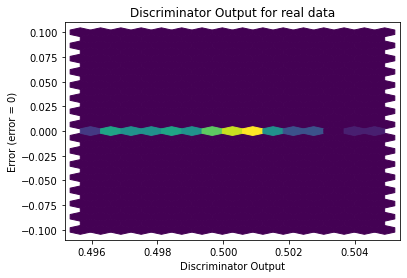

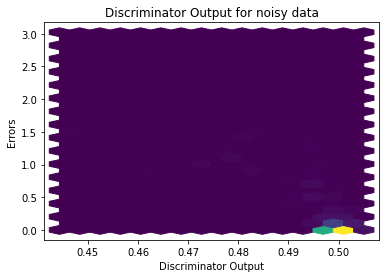

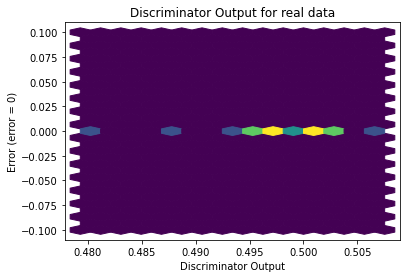

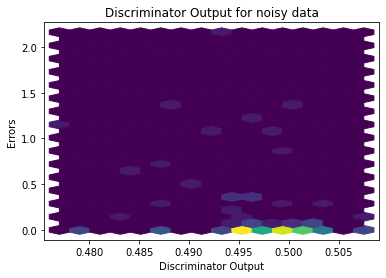

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


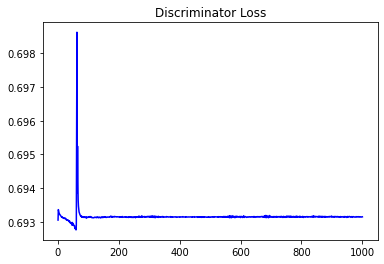

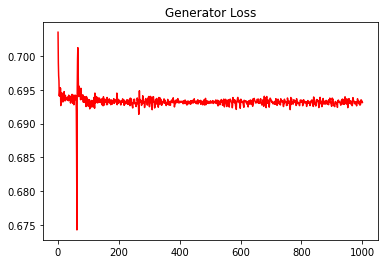

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03761457534206979


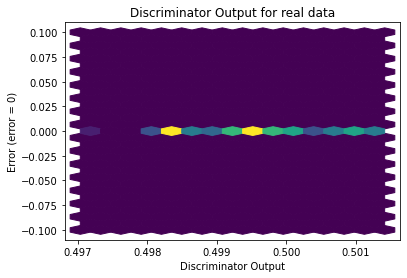

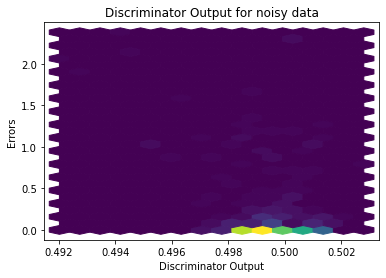

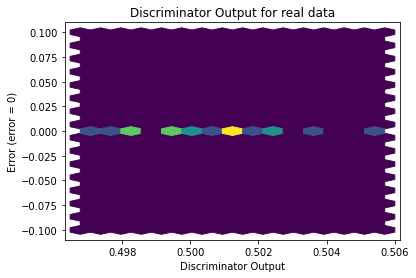

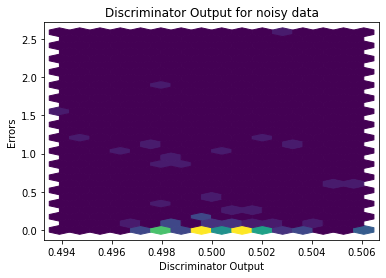

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0115]], requires_grad=True)
